# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Percentage of missing values in each column
miss_val_columns = (round((data.isnull().sum()/len(data.index))*100).to_frame('Null Value Percentage'))
miss_val_columns

,Null Value Percentage
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


0    284315
1       492
Name: Class, dtype: int64
Non-Fraudulent cases: 99.8273 %
 Fraudulent cases: 0.1727 %


C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


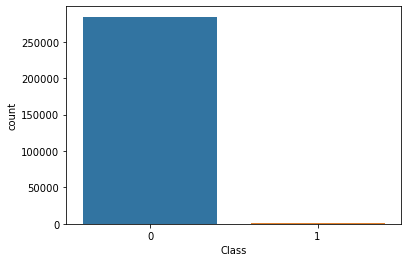

In [6]:
classes = data['Class'].value_counts()
print(classes)
no_fraud_cases = round(classes[0]/data['Class'].count() * 100,4)
fraud_cases = round(100 - no_fraud_cases,4)
print('Non-Fraudulent cases:',no_fraud_cases,'%\n','Fraudulent cases:',fraud_cases,'%')
sns.countplot(data['Class'])

In [7]:
df = data.drop(columns=['Time'],axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


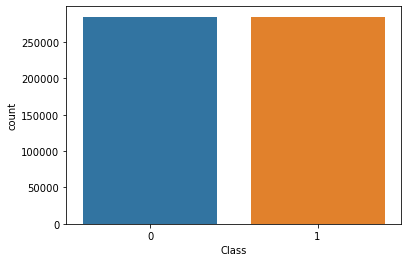

In [8]:
df_pos = df[df["Class"] == 1]
df_pos = pd.concat([df_pos]*int(len(df)/len(df_pos)),ignore_index=True)
df_pos = df_pos.multiply(np.random.uniform(0.9,1.1,size=df_pos.shape))
df_pos["Class"] = 1
df_extend = df.append(df_pos,ignore_index=True)
df_shuffle = df_extend.sample(frac=1, random_state=0)
sns.countplot(df_shuffle["Class"])

In [9]:
df = shuffle(df,random_state=140)

In [10]:
train_data = df[:int(0.5*len(df))+1]
val_data = df[int(0.5*len(df))+1:int(0.7*len(df))+1]
test_data = df[int(0.7*len(df))+1:]
train_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102677,-0.716472,1.092081,1.218260,0.800639,-0.087117,-0.464735,0.848744,-0.188368,-0.724907,0.262958,...,0.247734,0.653411,-0.161154,0.558295,-0.350730,-0.401799,-0.211060,0.180073,54.81,0
282411,-0.610634,1.039029,0.735956,-0.684721,0.690262,-0.978147,1.145189,-0.270532,-0.363342,-0.474575,...,-0.231383,-0.482784,-0.100982,0.019929,-0.270542,0.188890,0.205602,0.190317,10.98,0
62226,1.148079,0.255160,0.550855,1.313110,-0.168463,-0.191707,0.053114,-0.033897,0.119626,-0.117772,...,-0.168928,-0.322914,0.034642,0.082612,0.472873,-0.471379,0.047179,0.025564,15.40,0
82788,-2.733772,3.045381,-0.731167,-0.260239,-0.720494,-0.204335,-1.131794,-1.128770,-0.261180,-0.085141,...,2.022038,-1.624111,0.380603,-0.540180,0.272465,0.159045,0.304846,0.098590,8.99,0
160002,2.081934,-0.117493,-1.484408,0.191253,0.097451,-0.941226,0.080714,-0.222797,0.941184,-0.062658,...,0.248772,0.804576,0.025836,0.722872,0.313308,-0.448706,-0.004534,-0.049780,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91240,-0.397038,0.612482,1.483597,-0.565354,-0.449921,-1.154230,0.956277,-0.219796,-0.453112,-0.713600,...,-0.088682,-0.411742,0.141761,0.743238,-0.309694,0.782943,-0.057182,0.053217,70.13,0
64230,-0.775911,0.895041,1.787367,1.062231,0.634943,-0.203298,1.176919,-0.674327,0.481697,1.023103,...,-0.190030,0.475911,-0.068606,0.432574,-0.262188,-0.419543,-0.160429,-0.395000,1.00,0
69170,-2.020006,1.749018,0.664255,-1.528626,-0.725893,-0.438113,-0.314299,1.130104,-0.034484,-0.123901,...,-0.009755,-0.051922,0.093018,0.035200,-0.244580,0.750549,0.334610,0.218783,0.69,0
190309,1.943498,-0.443259,-0.418054,0.477289,-0.787452,-0.802788,-0.441401,-0.034457,1.436844,-0.125486,...,-0.232017,-0.655033,0.380551,-0.114481,-0.488706,-0.659205,0.016005,-0.030878,32.53,0


In [11]:
print("Number of fraudulent transactions in the validation set: {}"\
      .format(val_data["Class"].value_counts()[1]))
print("Number of fraudulent transactions in the test set: {}"\
      .format(test_data["Class"].value_counts()[1]))

Number of fraudulent transactions in the validation set: 101
Number of fraudulent transactions in the test set: 133


train_pos = train[train["Class"] == 1]
train_pos = pd.concat([train_pos]*int(len(train)/len(train_pos)),ignore_index=True)
train_pos = train_pos.multiply(np.random.uniform(0.9,1.1,size=train_pos.shape))
train_pos["Class"] = 1
train_extend = train.append(train_pos,ignore_index=True)
train_shuffle = train_extend.sample(frac=1, random_state=0)
sns.countplot(train_shuffle["Class"])

In [12]:
x_train = train_data.drop(labels=["Class"], axis=1)
y_train = train_data["Class"]
x_val = val_data.drop(labels=["Class"], axis=1)
y_val = val_data["Class"]
x_test = test_data.drop(labels=["Class"], axis=1)
y_test = test_data["Class"]

In [13]:
x_train.shape

(142404, 29)

In [14]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_val[x_val.columns] = scaler.transform(x_val)
x_test[x_test.columns] = scaler.transform(x_test)

In [15]:
model = Sequential()
model.add(Dense(20,activation='relu',input_dim=x_train.shape[1],))
model.add(Dropout(0.3))
model.add(Dense(14,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='relu'))

In [ ]:
model.compile(optimizer=Adam(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_val, y_val),callbacks=[ReduceLROnPlateau(patience=2, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=3, verbose=1)])

Train on 142404 samples, validate on 56961 samples
Epoch 1/100
142404/142404 [==============================] - 17s 121us/sample - loss: 0.4140 - acc: 0.9445 - val_loss: 0.0300 - val_acc: 0.9979
Epoch 2/100
142404/142404 [==============================] - 15s 108us/sample - loss: 0.0771 - acc: 0.9896 - val_loss: 0.0274 - val_acc: 0.9982
Epoch 3/100
141888/142404 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9965

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = np.arange(1, len(history_dict["acc"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict["acc"], 'bo', label='Training acc')
plt.plot(epochs, history_dict["val_acc"], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_results = model.evaluate(x_test, y_test)
print("The model test accuracy is {}.".format(test_results[1]))

In [ ]:
predictions = model.predict_classes(x_test)
ap_score = average_precision_score(y_test, predictions)
print("The model test average precision score is {}.".format(ap_score))

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, predictions))
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
sns.heatmap(confusion, annot=True)
plt.yticks(rotation=0)